# Differential geometry operations using sphere test case

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections, lines, path, patches

In [2]:
import os
import sys
sys.path.append(os.path.abspath('../'))
from sphere import Sphere

## One-dimensional example
Code written to extend to an arbitrary number of dimensions ($n_{dim} \leq 200$ tested). Show one-dimensional examples here, for ease of plotting.

Text(-1, -1, '$\\mathbb{R}^2$')

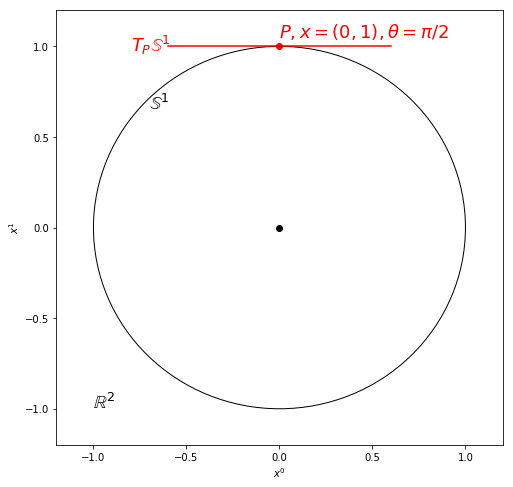

In [3]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
ax.add_artist(circle)
ax.add_line(lines.Line2D([-0.6, 0.6], [1., 1.], color="r", linestyle="-"))
#ax.add_line(lines.Line2D([0., 1.], [0., 0.], color="k", linestyle="--"))
#ax.add_line(lines.Line2D([0., 0.5], [0., 0.5*np.sqrt(3)], color="k", linestyle="--"))
#wedge = patches.Wedge((0., 0), 0.3, 0, 60, fill=False)
#ax.add_artist(wedge)
ax.scatter([0.],[0.], color="k")
ax.scatter([0.],[1.], color='r')
ax.annotate(r"$P, x=(0, 1),\theta=\pi/2$", xy=(0, 1), xytext=(0, 1.05), fontsize=18, color='r')
ax.annotate(r"$T_P\mathbb{S}^1$", xy=(-0.7, 1), xytext=(-0.8, 0.97), fontsize=18, color='r')
ax.annotate(r"$\mathbb{S}^1$", xy=(-0.7, 1), xytext=(-0.7, 0.65), fontsize=18, color='k')
ax.annotate(r"$\mathbb{R}^2$", xy=(-0.7, 1), xytext=(-1, -1), fontsize=18, color='k')
#ax.annotate(r"$\theta$", xy=(0.2, 0.2), xytext=(0.3, 0.2), fontsize=18, color='k')

The circle, $\mathbb{S}^1$ (one-sphere), is embedded in a 2-dimensional Euclidean ambient space, $\mathbb{R}^2$. Each point, $p$ on the manifold has its own one-dimensional tangent space, $T_P\mathcal{S}^1$. 

### Some code to make plots

In [4]:
def plot_vectors(point, vector, v_TpS=None, new_point=None):
    
    fig = plt.figure(figsize=(8,8))
    ax = plt.gca(xlim=[-0.2, 1.2], ylim=[0.4,1.8], xlabel="$x^0$", ylabel="$x^1$")
    circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
    ax.add_artist(circle)

    ax.scatter(point[0,0], point[0,1], color='r')
    ax.annotate(r"$P$", xy=(0, 1), xytext=(0.67, 0.62), fontsize=18, color='r')

    ax.arrow(point[0,0], point[0,1], vector[0,0], vector[0,1], 
            width=0.01, length_includes_head=True, color='tab:blue')
    ax.annotate(r"$v$", xy=(0, 1), xytext=(0.75, 1.65), fontsize=18, color='tab:blue')
    
    if v_TpS is not None:
        tangent_space_line = [point-1.2*v_TpS, point+1.2*v_TpS]
        ax.add_line(lines.Line2D([tangent_space_line[0][0,0], tangent_space_line[1][0,0]],
                              [tangent_space_line[0][0,1], tangent_space_line[1][0,1]],
                              color="r", linestyle="-"))
        ax.annotate(r"$T_P\mathcal{S}^1$", xy=(-0., 1), xytext=(0.1, 1.32), fontsize=18, color='r')
        ax.annotate(r"$v_{TpS}$", xy=(0, 1), xytext=(0.25, 1.2), fontsize=18, color='tab:blue')
        ax.add_line(lines.Line2D([(point+vector)[0,0], 
                                  (point+v_TpS)[0,0]
                                 ],
                                 [(point+vector)[0,1], 
                                  (point+v_TpS)[0,1]
                                 ], linestyle="--"
                                )
                   )
        ax.arrow(point[0,0], point[0,1], v_TpS[0,0], v_TpS[0,1], 
                width=0.01, length_includes_head=True, color='tab:blue')
    if new_point is not None:
        ax.scatter(new_point[0,0], new_point[0,1], color='r')
        ax.annotate(r"$P'$", xy=(0, 1), xytext=(0.07, 0.92), fontsize=18, color='r')
        geodesic = patches.Arc(xy=(0,0),width=2., height=2., angle=0., color="tab:blue", linewidth=4,
                           theta1=np.degrees(np.arccos(point[0,0])), 
                           theta2=np.degrees(np.arccos(new_point[0,0])),
                           alpha=1.0
                          )
        ax.add_patch(geodesic)
        ax.arrow(new_point[0,0], new_point[0,1], -0.01, 0.0,
            width=0.01, length_includes_head=True, color='tab:blue', alpha=1.0)


## Projecting to tangent space
A vector in the ambient space can be projected onto the tangent space at point $p$:

$$
\Pi_p({v}) = {v + \frac{p.v}{p.p}p}
$$

In [5]:
sphere = Sphere(1)
point = np.array([[np.cos(0.25*np.pi), np.sin(0.25*np.pi)]])
vector = np.array([[0.,1.]])
v_TpS = sphere.project_to_tangent_space(point, vector)
print(point)
print(v_TpS)

[[0.70710678 0.70710678]]
[[-0.5  0.5]]


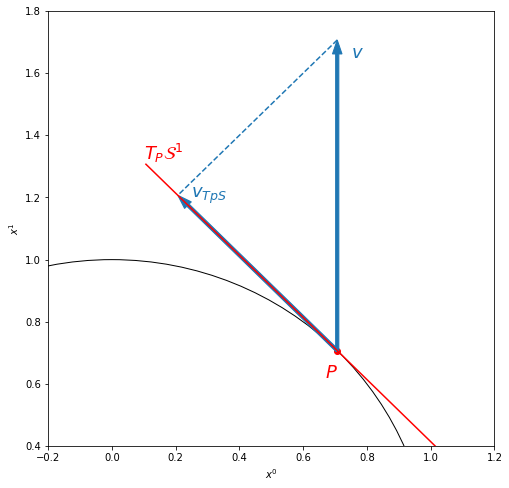

In [6]:
plot_vectors(point, vector, v_TpS)

## Exponential map
A vector in the tangent space can be `wrapped' onto the manifold:

$$
\mathrm{Exp}_p({v}) = \cos(\|v\|)p + \sin(\|v\|)\frac{v}{\|v\|}
$$

In [7]:
new_point = sphere.exponential_map(point, v_TpS)

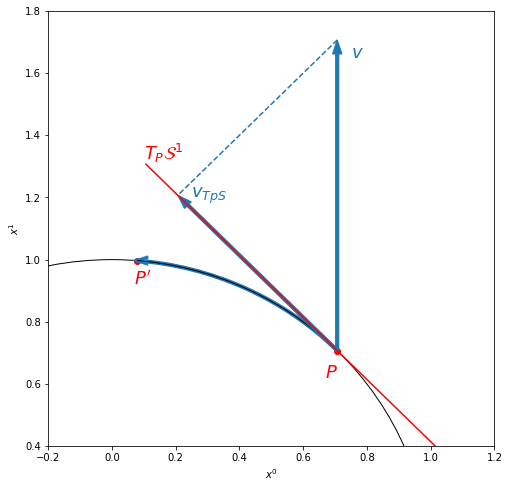

In [8]:
plot_vectors(point, vector, v_TpS, new_point)

## Parallel transport
Vectors can be parallel transported, i.e. moved from point to point while maintaining a constant angle between the vector and the path it is being moved along.

In [11]:
# Copy Sphere.parallel_transport code, to retain the intermediate vectors as we pole transport
# from point to point to point
def parallel_transport(manifold, vec_Tp0M, point_0, point_1, n_steps = 10):
    '''
    Parallel transport vector in tangent space of point 0 (Tp0M) to the tangent
    space of point 1 (Tp1M).
    :param vec_Tp0M: (m, n-dims+1) np.array, vector in Tp0M to be transported
    :param point_0: initial point where vec_Tp0M
    :param point_1: final point to which vec_Tp0M will be transported
    :param n_steps: number of steps to break pole transport into
    :return: vec_Tp0M after parallel transport to point 1
    '''
    # todo: check whether vector is in tangent space

    # Get rows that are actually changing in this batch. The others will stay the same.
    point_a = point_0.copy()
    vec_TpaM = vec_Tp0M.copy()
    vecs = [vec_TpaM]
    points = [point_a]
    for i in range(n_steps):
        point_b = manifold.exponential_map(
                point_a,
                (1 / (n_steps - i))*manifold.logarithmic_map(point_a, point_1)
            )
        vec_TpaM = manifold._pole_ladder_transport(vec_TpaM, point_a, point_b)
        vecs.append(vec_TpaM)
        point_a = point_b
        points.append(point_a)

    return points, vecs

In [15]:
point0 = np.array([[1., 0.]])
vector0 = np.array([[0., 0.5]])
#point1 = np.array([[-0.999, 0.0447]])
point1 = np.array([[np.cos(0.999*np.pi), np.sin(0.999*np.pi)]])
points, vectors1 = parallel_transport(sphere, vector0, point0, point1, n_steps=10)
vector1 = sphere.parallel_transport(vector0, point0, point1, n_steps=10)

In [16]:
print(vector1)

[[-0.00157079 -0.49999753]]


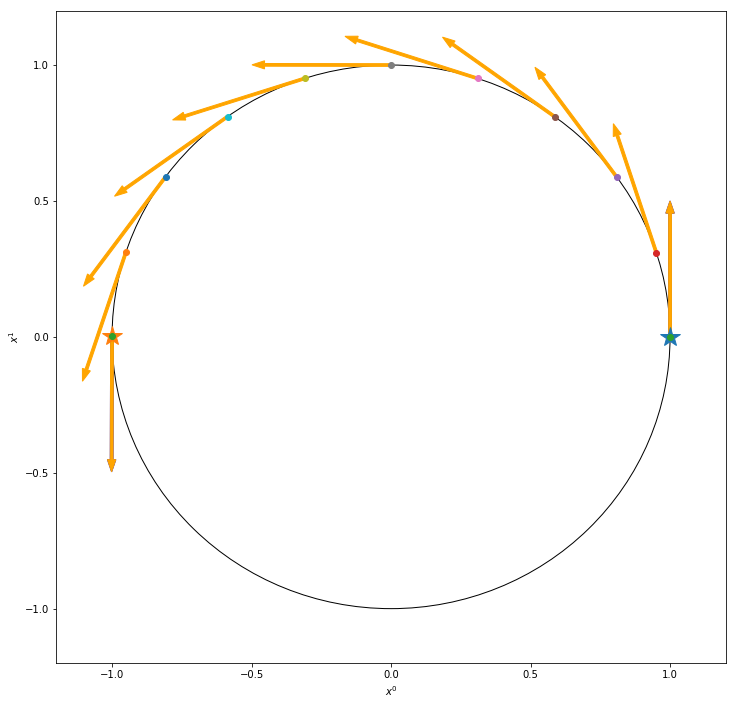

In [17]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
ax.add_artist(circle)
ax.plot(point0[0, 0], point0[0, 1], marker='*', markersize=20)
ax.plot(point1[0, 0], point1[0, 1], marker='*', markersize=20)
ax.arrow(point0[0, 0], point0[0, 1], vector0[0, 0], vector0[0, 1], 
        width=0.01, length_includes_head=True, color='b')
ax.arrow(point1[0, 0], point1[0, 1], vector1[0, 0], vector1[0, 1], 
        width=0.01, length_includes_head=True, color='b')
for point, vector_1 in zip(points, vectors1):
    ax.plot(point[0, 0], point[0, 1], marker='o')
    ax.arrow(point[0, 0], point[0, 1], vector_1[0, 0], vector_1[0, 1], 
        width=0.01, length_includes_head=True, color='orange')